# Decision tree
* A "white-box" classifier, easy to understand and visualize
* Decide on one parameter boundary at a time
* Does not need feature scaling

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [64]:
iris = pd.read_csv("datasets/iris/iris.csv")
X = iris.iloc[:,2:-1] #petal length and width
y = iris.target

In [65]:
from sklearn.tree import DecisionTreeClassifier
 
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) #note the randomness here
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

## Visualize

In [66]:
# Use conda install rather than pip so graphviz executable is also installed 
!conda install -y -c conda-forge python-graphviz

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: done

# All requested packages already installed.



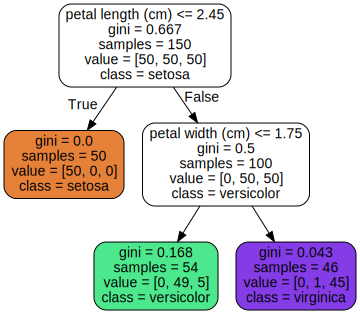

In [67]:
from graphviz import Source
from sklearn import tree
Source( 
    tree.export_graphviz(tree_clf, out_file=None, 
                         feature_names=X.columns, class_names=y.unique(), 
                         rounded=True, filled=True)
)

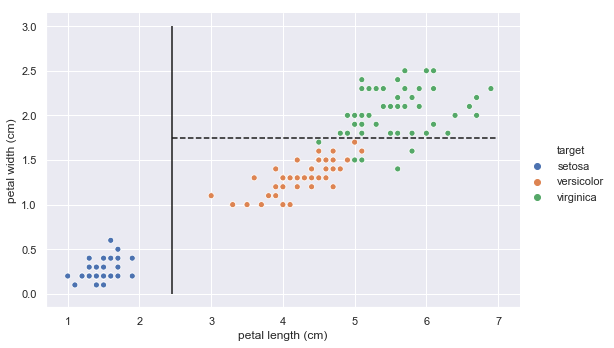

In [68]:
# The decision tree represented as a partition in 2D space of 2 variables. 
# A prediction is simply traversing down the tree

sns.relplot(data=iris, x="petal length (cm)", y="petal width (cm)", hue="target", aspect=1.5)

plt.vlines(2.45, 0, 3) # Depth = 0, petal_length <= 2.45
plt.hlines(1.75, 2.45, 7, linestyle='--') # Depth = 1, petal_length <= 2.45 & petal width <= 1.75